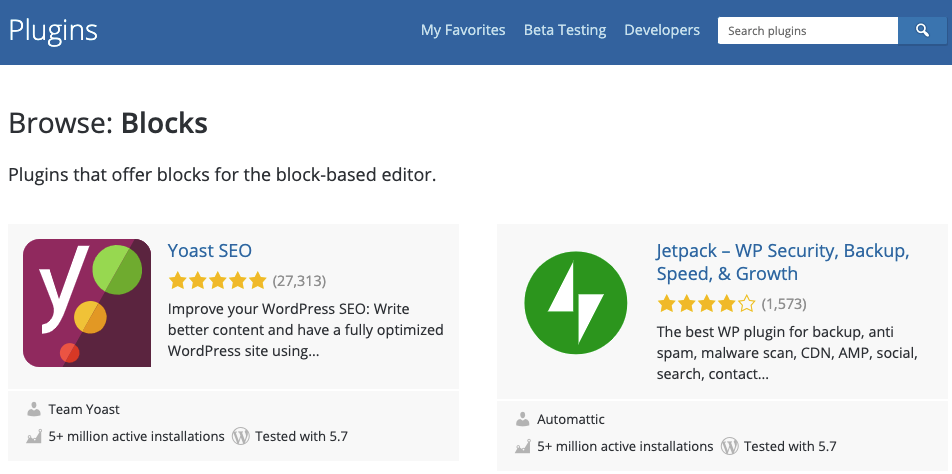

Target: `https://wordpress.org/plugins/browse/blocks/`
`https://wordpress.org/plugins/browse/blocks/page/2/`
1. Plugin title
2. Rating
  * Stars
  * Votes
3. Description
4. Author
5. Installations
6. WP version
7. Plugin url

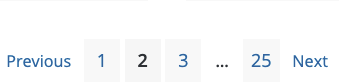

In [86]:
import requests
from bs4 import BeautifulSoup

In [87]:
def get_html(url):
    r = requests.get(url)
    return r.text

In [88]:
def stars_to_num(s):
    number = s.split()[0]
    return float(number.replace(',', '.'))

In [99]:
def calculate_pages_count(url='https://wordpress.org/plugins/browse/blocks/'):
    html = get_html(url)
    soup = BeautifulSoup(html, 'lxml')
    pages = int(soup.find_all('a', class_='page-numbers')[-2].text)  # last -> <Next> # next to last <number of pages>
    return pages

In [101]:
def get_page_data(html):
    soup = BeautifulSoup(html, 'lxml')
    blocks = soup.find("div", {"id": "primary"})
    articles = blocks.find_all('article')
    for article in articles:
        title = article.find('h3').text.strip()
        stars = float(article.find('div', class_='wporg-ratings').get('data-rating'))
        votes = stars_to_num(article.find('span', class_='rating-count').find('a').text)
        description = article.find('div', class_='entry-excerpt').text.strip()
        autor = article.find('span', class_='plugin-author').text.strip()
        installations_count = article.find('span', class_='active-installs').text .strip()
        wp_version = article.find('span', class_='tested-with').text .strip()
        plugin_url = article.find('h3').find('a').get('href').strip()
        
        print(title, stars, votes, description, autor, installations_count, wp_version, plugin_url, sep='\n', end=3*'\n')

In [97]:
def main():
    pattern = 'https://wordpress.org/plugins/browse/blocks/page/{page_num}/'
    pages = calculate_pages_count()
    for i in range(1, pages + 1):
        url = pattern.format(page_num=i) 
        html = get_html(url)
        get_page_data(html)
        break

In [102]:
main()

Yoast SEO
5.0
27.313
Improve your WordPress SEO: Write better content and have a fully optimized WordPress site using…
Team Yoast
5+ million active installations
Tested with 5.7
https://wordpress.org/plugins/wordpress-seo/


Jetpack – WP Security, Backup, Speed, & Growth
4.0
1.573
The best WP plugin for backup, anti spam, malware scan, CDN, AMP, social, search, contact…
Automattic
5+ million active installations
Tested with 5.7
https://wordpress.org/plugins/jetpack/


Contact Form by WPForms – Drag & Drop Form Builder for WordPress
5.0
8.707
The best WordPress contact form plugin. Drag & Drop online form builder that helps you…
WPForms
4+ million active installations
Tested with 5.6.2
https://wordpress.org/plugins/wpforms-lite/


Advanced Editor Tools (previously TinyMCE Advanced)
4.5
316.0
Extends and enhances the block editor (Gutenberg) and the classic editor (TinyMCE).
Automattic
2+ million active installations
Tested with 5.6.2
https://wordpress.org/plugins/tinymce-advanced/


MC4